In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#

In [2]:
dataset = pd.read_csv("City_day.csv");

dataset.dropna(axis=0, subset = ["Air_quality", "Xylene", "AQI", "Toluene",
                                  "Benzene", "O3", "SO2", "CO", "NH3", "NOx", 
                                  "NO2", "PM10", "PM2.5", "NO"], how = 'all', inplace= True)
dataset.dropna(subset = ["Air_quality"], inplace=True)
      
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,15].values

print(dataset.head())

         City       Date   PM2.5  PM10     NO    NO2    NOx  NH3     CO  \
28  Ahmedabad  1/29/2015   83.13   NaN   6.93  28.71  33.72  NaN   6.93   
29  Ahmedabad  1/30/2015   79.84   NaN  13.85  28.68  41.08  NaN  13.85   
30  Ahmedabad  1/31/2015   94.52   NaN  24.39  32.66  52.61  NaN  24.39   
31  Ahmedabad   2/1/2015  135.99   NaN  43.48  42.08  84.57  NaN  43.48   
32  Ahmedabad   2/2/2015  178.33   NaN  54.56  35.31  72.80  NaN  54.56   

      SO2      O3  Benzene  Toluene  Xylene    AQI Air_quality  
28  49.52   59.76     0.02     0.00    3.14  209.0        Poor  
29  48.49   97.07     0.04     0.00    4.81  328.0   Very Poor  
30  67.39  111.33     0.24     0.01    7.67  514.0      Severe  
31  75.23  102.70     0.40     0.04   25.87  782.0      Severe  
32  55.04  107.38     0.46     0.06   35.61  914.0      Severe  


In [3]:
# Check for possible null values in the dataset as missing values potentially screw the ml models
dataset.isnull().sum()

City               0
Date               0
PM2.5            635
PM10            6975
NO               308
NO2              305
NOx             1785
NH3             6323
CO               416
SO2              554
O3               709
Benzene         3270
Toluene         5435
Xylene         14208
AQI                0
Air_quality        0
dtype: int64

In [4]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
imputer = imputer.fit(x[:,2:15])
x[:,2:15] = imputer.transform(x[:,2:15])


In [5]:
le_X_city = LabelEncoder()
le_X_date = LabelEncoder()
le_Y = LabelEncoder()
y = le_Y.fit_transform(y)

x[:,0] = le_X_city.fit_transform(x[:,0])
x[:,1] = le_X_date.fit_transform(x[:,1])

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21937 entries, 28 to 26218
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         21937 non-null  object 
 1   Date         21937 non-null  object 
 2   PM2.5        21302 non-null  float64
 3   PM10         14962 non-null  float64
 4   NO           21629 non-null  float64
 5   NO2          21632 non-null  float64
 6   NOx          20152 non-null  float64
 7   NH3          15614 non-null  float64
 8   CO           21521 non-null  float64
 9   SO2          21383 non-null  float64
 10  O3           21228 non-null  float64
 11  Benzene      18667 non-null  float64
 12  Toluene      16502 non-null  float64
 13  Xylene       7729 non-null   float64
 14  AQI          21937 non-null  float64
 15  Air_quality  21937 non-null  object 
dtypes: float64(13), object(3)
memory usage: 2.8+ MB


In [7]:
# the describe method gives a quick overview of basic metrics of the dataset
dataset.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,21302.000000,14962.000000,21629.000000,21632.000000,20152.000000,15614.000000,21521.000000,21383.000000,21228.000000,18667.000000,16502.000000,7729.000000,21937.000000
mean,71.819536,125.867953,18.336627,29.537978,33.470678,25.751801,2.552130,14.801633,34.833688,3.465744,9.910826,3.741817,175.840908
std,65.402215,93.019867,22.987785,25.341563,31.934069,27.323008,7.508587,18.342644,21.432535,16.922770,22.126794,7.134129,146.143064
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.100000,0.000000,0.000000,0.000000,13.000000
25%,31.670000,61.692500,5.950000,12.100000,13.147500,9.630000,0.610000,5.610000,19.437500,0.230000,1.060000,0.300000,85.000000
50%,52.430000,101.555000,10.170000,22.360000,24.310000,18.420000,0.970000,9.170000,31.330000,1.180000,3.370000,1.270000,124.000000
75%,85.987500,158.837500,20.910000,38.702500,42.090000,33.130000,1.560000,15.500000,45.862500,3.100000,10.047500,4.350000,226.000000
max,914.940000,917.080000,287.140000,362.210000,293.100000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000


AxesSubplot(0.125,0.125;0.775x0.755)


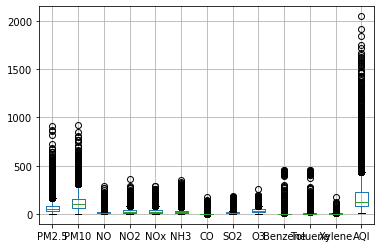

In [8]:
print(dataset.boxplot())

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

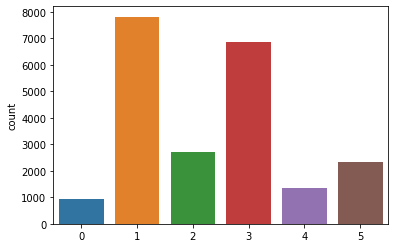

In [10]:
ax = sns.countplot(y)

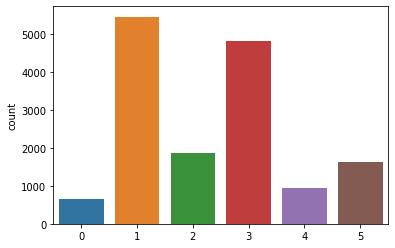

In [11]:
#Before OverSampling
ax = sns.countplot(y_train)

In [12]:
print('Classes and number of values in trainset',Counter(y_train))
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train, y_train = oversample.fit_resample(x_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))
med=np.median(x_train,axis=0)

Classes and number of values in trainset Counter({1: 5450, 3: 4808, 2: 1867, 5: 1618, 4: 951, 0: 661})
Classes and number of values in trainset after SMOTE: Counter({3: 5450, 1: 5450, 2: 5450, 5: 5450, 4: 5450, 0: 5450})


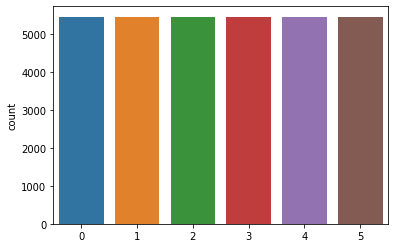

In [13]:
#After Oversampling
sns.countplot(y_train)

In [14]:
classlabels=['Good','Moderate','Poor','Satisfactory','Severe','Very Poor']
import itertools
def plot_confusion_matrix(cm,title, classes=classlabels,
                          cmap=plt.cm.Blues):

    plt.figure(figsize=(5,4.8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

#     print(cm)

    thresh = cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

The accuracy of this model is :  99.9240352476451
Precision :  99.9240352476451
Recall :  99.9240352476451
F1 Score :  99.9240352476451


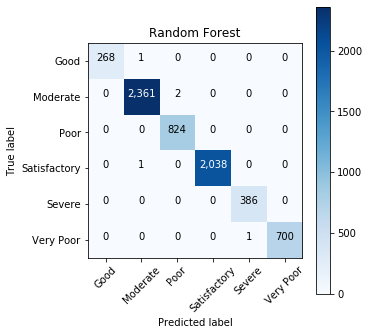

In [15]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100,random_state = 0)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,title="Random Forest")

a = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')        
f1 = f1_score(y_test,y_pred, average='micro')
print("The accuracy of this model is : ", a*100)
print("Precision : ",precision*100)
print("Recall : ",recall*100)
print("F1 Score : ",f1*100)

The accuracy of this model is :  100.0
Precision :  100.0
Recall :  100.0
F1 Score :  100.0


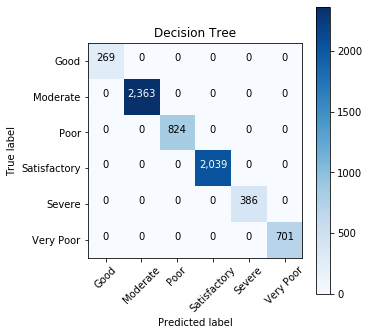

In [16]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,title="Decision Tree")

a = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')        
f1 = f1_score(y_test,y_pred, average='micro')
print("The accuracy of this model is : ", a*100)
print("Precision : ",precision*100)
print("Recall : ",recall*100)
print("F1 Score : ",f1*100)

The accuracy of this model is :  100.0
Precision :  100.0
Recall :  100.0
F1 Score :  100.0


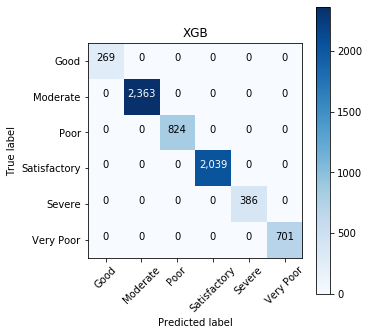

In [17]:
from xgboost import XGBClassifier
cls = XGBClassifier()
cls.fit(x_train,y_train)
y_pred = cls.predict(x_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm,title="XGB")

a = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred, average='micro')
recall = recall_score(y_test,y_pred, average='micro')        
f1 = f1_score(y_test,y_pred, average='micro')
print("The accuracy of this model is : ", a*100)
print("Precision : ",precision*100)
print("Recall : ",recall*100)
print("F1 Score : ",f1*100)